In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [3]:
data_copy['market_value'] = data_copy.spx
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [4]:
data_copy['white_noise'] = np.random.normal(loc = data_copy.market_value.mean(),scale = data_copy.market_value.std(),size = len(data_copy))

(0.0, 2300.0)

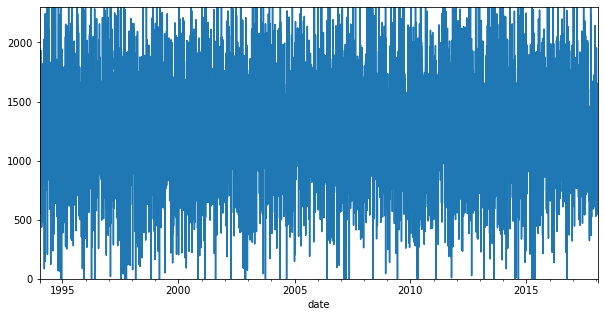

In [5]:
plt.figure(figsize = (10,5))
data_copy.white_noise.plot()
plt.ylim(0,2300)

(0.0, 2300.0)

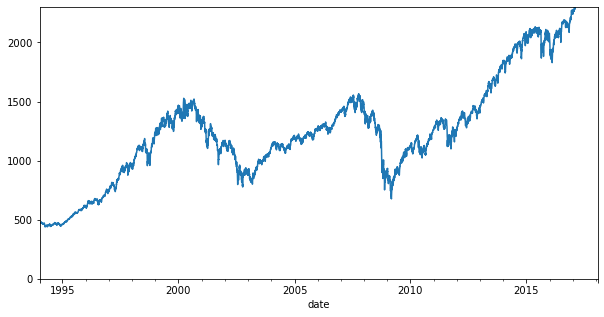

In [6]:
plt.figure(figsize = (10,5))
data_copy.market_value.plot()
plt.ylim(0,2300)

### Random Walk

In [7]:
random_walk_data = pd.read_csv('RandWalk.csv')


In [8]:
random_walk_data.head()

date        price
0  07/01/1994  1122.139662
1  08/01/1994  1135.238562
2  09/01/1994  1109.897831
3  10/01/1994  1080.347860
4  11/01/1994  1082.095245

In [9]:
random_walk_data.date = pd.to_datetime(random_walk_data.date,dayfirst = True)

In [10]:
random_walk_data.set_index('date',inplace = True)
random_walk_data = random_walk_data.asfreq('b')

In [11]:
random_walk_data.head()

price
date                   
1994-01-07  1122.139662
1994-01-10  1080.347860
1994-01-11  1082.095245
1994-01-12  1083.639265
1994-01-13  1067.146255

In [12]:
data_copy['rw'] = random_walk_data.price

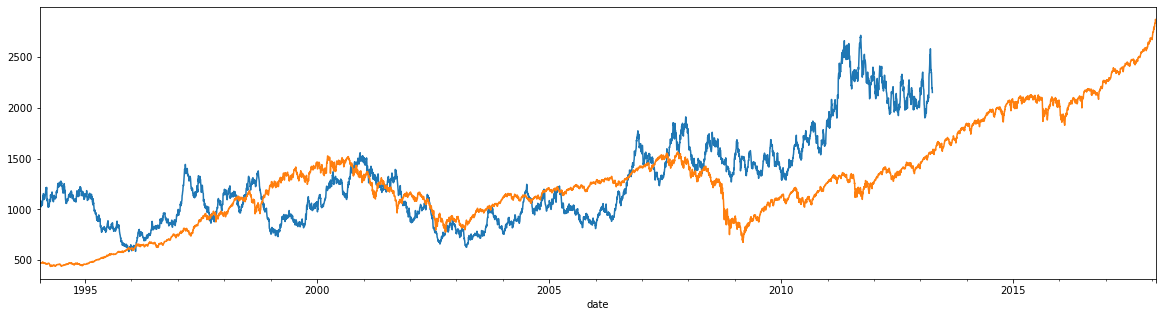

In [13]:
plt.figure(figsize = (20,5))
data_copy.rw.plot()
data_copy.market_value.plot()

### Dickey fuller test for stationarity

In [14]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [15]:
sts.adfuller(data_copy.market_value)

(1.119498638172841,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

first value - test statistic.
second value - p value .
third value - autocorrelation, in this case there is some correlation with 10 lags.
fourth - number of observations

In [16]:
sts.adfuller(data_copy.white_noise)

(-81.17875186774685,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94948.88023288501)

### Seaonality and seasonal decomposition

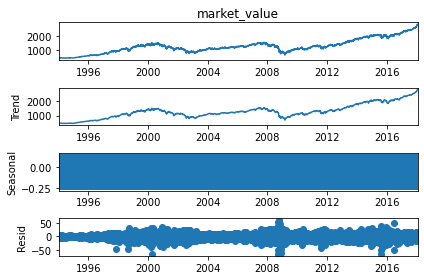

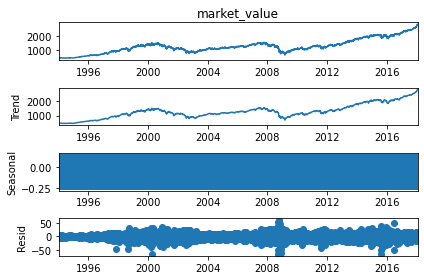

In [17]:
seasonal_decomposition_additive = seasonal_decompose(data_copy.market_value, model = 'additive')
seasonal_decomposition_additive.plot()

Additive decomposition suggests no seasonality

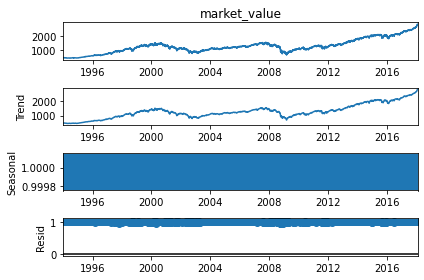

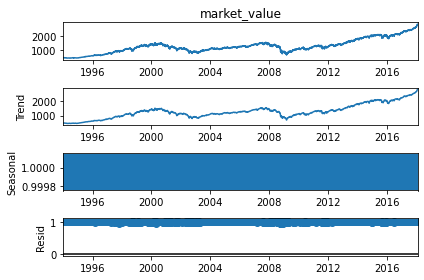

In [18]:
seasonality_decomposition_multiplicative = seasonal_decompose(data_copy.market_value,model ='multiplicative')
seasonality_decomposition_multiplicative.plot()

### Autocorrelation and ACF

In [19]:
import statsmodels.graphics.tsaplots as sgt

Text(0, 0.5, 'Correlation Coefficient')

<Figure size 1440x360 with 0 Axes>

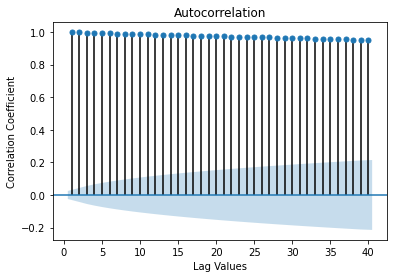

In [22]:
plt.figure(figsize = (20,5))
sgt.plot_acf(data_copy.market_value,lags = 40,zero = False)
plt.xlabel("Lag Values")
plt.ylabel("Correlation Coefficient")

The lines represent the correlation between lags. The blue area represents the significance the values outside are representation of autocorrelation. If the values are outside the correlation is significant. If the values don't get into the blue area, the previous values are good predictors of the current values.

Text(0, 0.5, 'Correlation Coefficient')

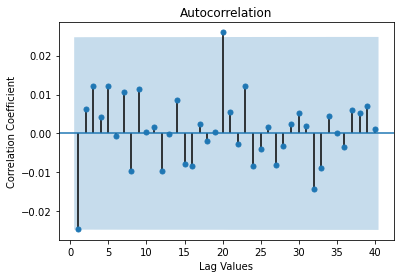

In [26]:
sgt.plot_acf(data_copy.white_noise,lags = 40,zero = False)
plt.xlabel("Lag Values")
plt.ylabel("Correlation Coefficient")

### Partial Autocorrelation function to capture the direct effects, it will cancel any indirect effects.

Text(0, 0.5, 'Correlation Coefficient')

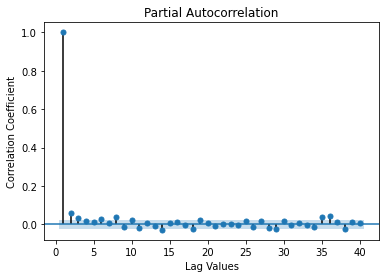

In [28]:
sgt.plot_pacf(data_copy.market_value,lags = 40, zero = False, method = ('ols'))
plt.xlabel("Lag Values")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

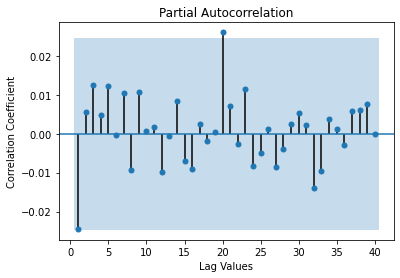

In [29]:
sgt.plot_pacf(data_copy.white_noise,lags = 40,zero = False,method = ('ols'))
plt.xlabel("Lag Values")
plt.ylabel("Correlation Coefficient")